<a href="https://colab.research.google.com/github/sunilbabu07/customer-conversion-prediction/blob/main/guvi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing required libraries**


In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score


# **Importing the dataset from github repository**

In [3]:
customer_df = pd.read_csv("https://github.com/sunilbabu07/customer-conversion-prediction/blob/main/train.csv?raw=true")
customer_df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


## **Check if the dataset is balanced**



In [4]:
customer_df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [5]:
customer_df['y']=customer_df['y'].map({'yes':1,'no':0})

In [6]:
customer_df.shape

(45211, 11)

In [7]:
customer_df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,0
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,0
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,0
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,0
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,0


In [8]:
customer_df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

# **Cleaning data**

In [9]:
customer_df.info()
customer_df.duplicated().value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 3.8+ MB


False    45205
True         6
dtype: int64

In [10]:
customer_df = customer_df.drop_duplicates()
customer_df.duplicated().sum()

0

In [11]:
customer_df.duplicated().value_counts()

False    45205
dtype: int64

In [12]:
customer_df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [13]:
print((customer_df['job'].unique()),  customer_df['marital'].unique(), customer_df['education_qual'].unique(), customer_df['call_type'].unique(), customer_df['mon'].unique(), customer_df['y'].unique())

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student'] ['married' 'single' 'divorced'] ['tertiary' 'secondary' 'unknown' 'primary'] ['unknown' 'cellular' 'telephone'] ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep'] [0 1]


In [14]:
customer_df.describe()

,age,day,dur,num_calls,y
count,45205.000000,45205.00000,45205.000000,45205.000000,45205.000000
mean,40.937087,15.80688,258.183055,2.763898,0.117000
std,10.619130,8.32234,257.538504,3.098189,0.321424
min,18.000000,1.00000,0.000000,1.000000,0.000000
25%,33.000000,8.00000,103.000000,1.000000,0.000000
50%,39.000000,16.00000,180.000000,2.000000,0.000000
75%,48.000000,21.00000,319.000000,3.000000,0.000000
max,95.000000,31.00000,4918.000000,63.000000,1.000000


# **EDA ("Exploratory Data Analysis") for categorical columns**







In [48]:
customer_df["age"].unique()

array([58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 57, 51, 45, 60, 56, 32,
       25, 40, 39, 52, 46, 36, 49, 59, 37, 50, 54, 55, 48, 24, 38, 31, 30,
       27, 34, 23, 26, 61, 22, 21, 20, 66, 62, 83, 75, 67, 70, 65, 68, 64,
       69, 72, 71, 19, 76, 85, 63, 90, 82, 73, 74, 78, 80, 94, 79, 77, 86,
       95, 81, 18, 89, 84, 87, 92, 93, 88])

In [49]:
customer_df["job"].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [50]:
customer_df['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [51]:
customer_df['education_qual'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [52]:
# Group the data by job and education qualification
grouped = customer_df.groupby(['job', 'education_qual']).size()
print(grouped)

job            education_qual
admin.         primary            209
               secondary         4218
               tertiary           572
               unknown            171
blue-collar    primary           3757
               secondary         5370
               tertiary           149
               unknown            454
entrepreneur   primary            183
               secondary          542
               tertiary           686
               unknown             76
housemaid      primary            627
               secondary          395
               tertiary           173
               unknown             45
management     primary            294
               secondary         1121
               tertiary          7800
               unknown            242
retired        primary            795
               secondary          984
               tertiary           366
               unknown            119
self-employed  primary            130
               secon

In [53]:
# Get the index of the maximum count for each job group
max_idx = grouped.groupby('job').idxmax()
print(max_idx)

job
admin.                 (admin., secondary)
blue-collar       (blue-collar, secondary)
entrepreneur      (entrepreneur, tertiary)
housemaid             (housemaid, primary)
management          (management, tertiary)
retired               (retired, secondary)
self-employed    (self-employed, tertiary)
services             (services, secondary)
student               (student, secondary)
technician         (technician, secondary)
unemployed         (unemployed, secondary)
unknown                 (unknown, unknown)
dtype: object


In [54]:
# Extract the corresponding education qualification
max_education = max_idx.apply(lambda x: x[1])
print(max_education)

job
admin.           secondary
blue-collar      secondary
entrepreneur      tertiary
housemaid          primary
management        tertiary
retired          secondary
self-employed     tertiary
services         secondary
student          secondary
technician       secondary
unemployed       secondary
unknown            unknown
dtype: object


In [55]:
customer_df['call_type'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [56]:
customer_df['mon'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [57]:
customer_df['prev_outcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [58]:
customer_df.groupby(['prev_outcome', 'y']).size()

prev_outcome  y
failure       0     4283
              1      618
other         0     1533
              1      307
success       0      533
              1      978
unknown       0    33567
              1     3386
dtype: int64

In [59]:
customer_df['num_calls'].unique()

array([ 1,  2,  3,  5,  4,  6,  7,  8,  9, 10, 11, 12, 13, 19, 14, 24, 16,
       32, 18, 22, 15, 17, 25, 21, 43, 51, 63, 41, 26, 28, 55, 50, 38, 23,
       20, 29, 31, 37, 30, 46, 27, 58, 33, 35, 34, 36, 39, 44])

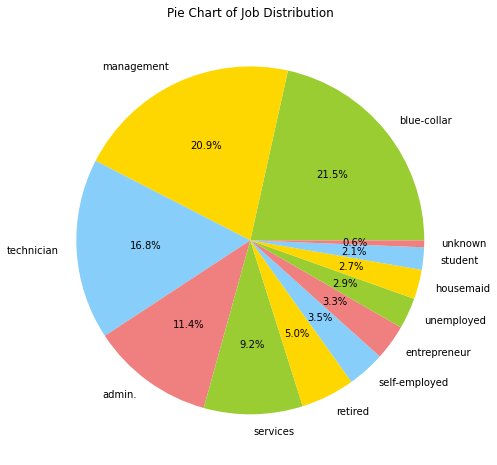

In [60]:
# Get the job counts and total number of jobs
job_counts = dict(customer_df['job'].value_counts())
total_jobs = customer_df['job'].value_counts().sum()

# Calculate the percentages
percentages = [(count / total_jobs) * 100 for count in job_counts.values()]

# Create the labels and colors
labels = list(job_counts.keys())
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']

# Create a figure and axis
fig, ax = plt.subplots(figsize=(14, 8))

# Create the pie chart
ax.pie(percentages, labels=labels, colors=colors, autopct='%1.1f%%')

# Set the title
ax.set_title('Pie Chart of Job Distribution')

# Show the plot
plt.show()


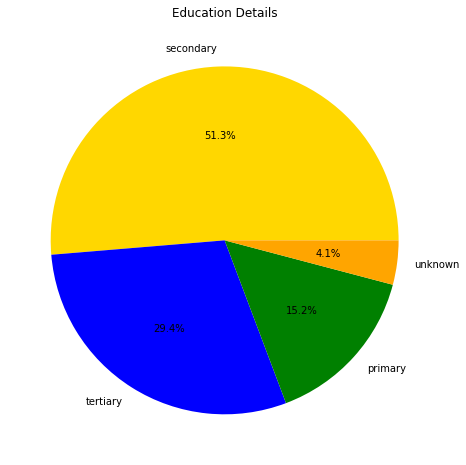

In [61]:
# Get the education counts and total number of educations
edu_counts = dict(customer_df['education_qual'].value_counts())
total_edus = customer_df['education_qual'].value_counts().sum()

# Calculate the percentages for the second chart
percentages = [(count / total_edus) * 100 for count in edu_counts.values()]

# Create the labels and colors for the second chart
labels = list(edu_counts.keys())
colors = ['gold', 'blue', 'green', 'orange', 'purple']

# Create a figure and axis for the second chart
fig, ax = plt.subplots(figsize=(8, 8))

# Create the pie chart for the second chart
ax.pie(percentages, labels=labels, colors=colors, autopct='%1.1f%%')

# Set the title for the second chart
ax.set_title("Education Details")

# Show the second chart
plt.show()


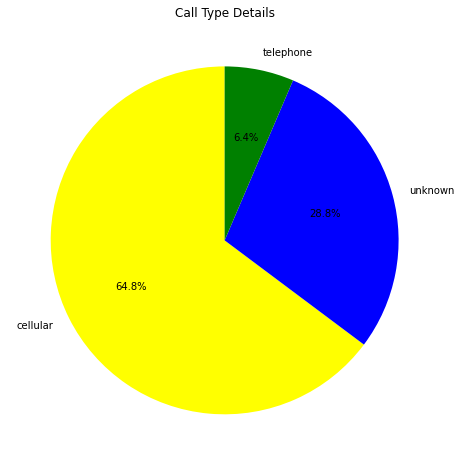

In [62]:
# Get the call type counts and total number of call type

call_type_count = dict(customer_df['call_type'].value_counts())
total_call_type = customer_df['call_type'].value_counts().sum()

# Calculate the percentages for the second chart
percent = []
for i in list(customer_df['call_type'].value_counts()):
    percent.append((int(i) / total_call_type) * 100)

# Creating the pie chart
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(percent, labels=call_type_count.keys(), autopct='%1.1f%%', startangle=90, colors=['yellow', 'blue', 'green', 'maroon', 'purple'])

# Setting the title
ax.set_title("Call Type Details")

# Displaying the chart
plt.show()

In [63]:
data = pd.get_dummies(customer_df, columns=['job','marital','education_qual','call_type','mon','prev_outcome'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45205 entries, 0 to 45210
Data columns (total 43 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   age                       45205 non-null  int64
 1   day                       45205 non-null  int64
 2   dur                       45205 non-null  int64
 3   num_calls                 45205 non-null  int64
 4   y                         45205 non-null  int64
 5   job_admin.                45205 non-null  uint8
 6   job_blue-collar           45205 non-null  uint8
 7   job_entrepreneur          45205 non-null  uint8
 8   job_housemaid             45205 non-null  uint8
 9   job_management            45205 non-null  uint8
 10  job_retired               45205 non-null  uint8
 11  job_self-employed         45205 non-null  uint8
 12  job_services              45205 non-null  uint8
 13  job_student               45205 non-null  uint8
 14  job_technician            45205 non-nu

In [64]:
data['y'].value_counts()


0    39916
1     5289
Name: y, dtype: int64

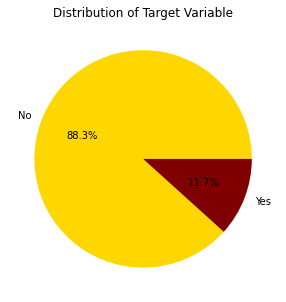

In [65]:
# Separating the features and target variable
x = data.drop('y', axis=1).values
y = data['y'].values

# Splitting the data into training and testing sets
x_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

# Creating a pie chart of the target variable distribution
plt.figure(figsize=(5,5))
plt.pie(data.y.value_counts(), labels=['No', 'Yes'], autopct='%1.1f%%', colors=['gold','maroon'])
plt.title("Distribution of Target Variable")
plt.show()


Original unbalanced dataset shape: 45205
Resampled balanced dataset shape: 79832


Text(0.5, 1.0, 'Balanced Target Variable Distribution')

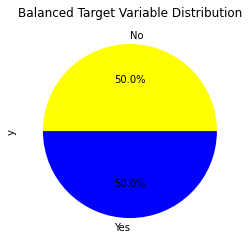

In [66]:
# Applying SMOTE to balance the data
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(x, y)

# Printing the shapes of original and resampled datasets
print('Original unbalanced dataset shape:', len(data))
print('Resampled balanced dataset shape:', len(y_smote))

# Creating a new balanced dataframe and plotting the balanced target variable distribution as a pie chart
balanced_df = pd.DataFrame(x_smote, columns=[i for i in data.columns if i != 'y'])
balanced_df['y'] = y_smote
pie_chart = balanced_df.y.value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['yellow','blue'], labels=['No', 'Yes'])
pie_chart.set_title("Balanced Target Variable Distribution")



In [67]:
# Extracting feature matrix x
x = balanced_df.drop(['y','prev_outcome_failure', 'prev_outcome_other', 'prev_outcome_success', 'prev_outcome_unknown'], axis=1)

# Printing the shape of X
print(x.shape)


(79832, 38)


# **Linear regression**

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7907450008847992


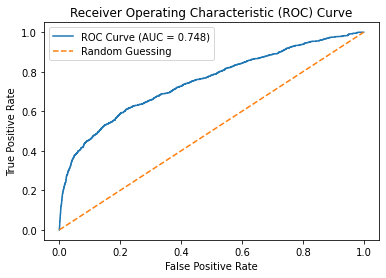

In [89]:
# Create a logistic regression object
lr = LogisticRegression()

# Fit the model on the training data
lr.fit(x_train, y_train)

# Get the accuracy score on the test data
accuracy = lr.score(X_test, y_test)

# Print the accuracy score
print("Accuracy:", accuracy)

# Get the ROC curve data
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])

# Get the ROC AUC score on the test data
roc_auc = roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])

# Plot the ROC curve
plt.plot(fpr, tpr, label="ROC Curve (AUC = {:.3f})".format(roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', label="Random Guessing")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.show()


# **KNN algorithm**

In [79]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(X_test)

for k in [1,2,3,4,5,6,7,8,9,10,20,50]:
    knn = KNeighborsClassifier(k)
    knn.fit(x_train_scaled, y_train)
    train_score = knn.score(x_train_scaled, y_train)
    cv_score = np.mean(cross_val_score(knn, x_train_scaled, y_train, cv=5))
    print(f"K = {k}, Train accuracy: {train_score:.4f}, CV accuracy: {cv_score:.4f}")

knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train_scaled, y_train)
test_score = knn.score(x_test_scaled, y_test)
print(f"Test accuracy: {test_score:.4f}")


K = 1, Train accuracy: 1.0000, CV accuracy: 0.8725
K = 2, Train accuracy: 0.9303, CV accuracy: 0.8889
K = 3, Train accuracy: 0.9326, CV accuracy: 0.8886
K = 4, Train accuracy: 0.9176, CV accuracy: 0.8920
K = 5, Train accuracy: 0.9190, CV accuracy: 0.8926
K = 6, Train accuracy: 0.9114, CV accuracy: 0.8929
K = 7, Train accuracy: 0.9123, CV accuracy: 0.8938
K = 8, Train accuracy: 0.9081, CV accuracy: 0.8938
K = 9, Train accuracy: 0.9090, CV accuracy: 0.8946
K = 10, Train accuracy: 0.9054, CV accuracy: 0.8946
K = 20, Train accuracy: 0.8992, CV accuracy: 0.8941
K = 50, Train accuracy: 0.8956, CV accuracy: 0.8922
Test accuracy: 0.8910


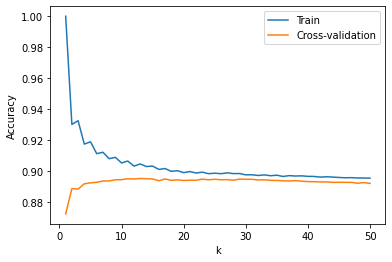

In [83]:
import matplotlib.pyplot as plt

train_scores = []
cv_scores = []

for k in range(1, 51):
    knn = KNeighborsClassifier(n_neighbors=k)
    train_score = knn.fit(x_train_scaled, y_train).score(x_train_scaled, y_train)
    cv_score = np.mean(cross_val_score(knn, x_train_scaled, y_train, cv=5)) 
    train_scores.append(train_score)
    cv_scores.append(cv_score)

plt.plot(range(1, 51), train_scores, label="Train")
plt.plot(range(1, 51), cv_scores, label="Cross-validation")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [85]:
cv_scores

[0.8725481314048146,
 0.888859384563584,
 0.8885643384104206,
 0.8919564164838507,
 0.8926052404797545,
 0.8929297242555657,
 0.8937851118799317,
 0.8938146452063919,
 0.8945519995789033,
 0.8946405125548175,
 0.8952304656555994,
 0.8950830165319635,
 0.8953779321799283,
 0.8952304874064657,
 0.8950830339326566,
 0.8939326523572066,
 0.8950829295284978,
 0.894198043379058,
 0.8945225054040028,
 0.8940800405784165,
 0.8942865172034127,
 0.894257049129552,
 0.8949944339532765,
 0.8945520082792499,
 0.894876431152635,
 0.8945520169795964,
 0.8946699806286784,
 0.8942570534797254,
 0.8950534179529042,
 0.8948764659540214,
 0.8948764398529816,
 0.8944339924280884,
 0.8945519734778635,
 0.8941979955271518,
 0.8941095173526236,
 0.8938735378523802,
 0.8937850509775057,
 0.8939915406530219,
 0.8936670655775572,
 0.8934015832020668,
 0.8933131267784052,
 0.8931656298028632,
 0.8931951283279369,
 0.8929001778785859,
 0.8929296633531395,
 0.8929001996294522,
 0.892900195279279,
 0.892339749403917

In [87]:
train_scores

[1.0,
 0.9302716573754535,
 0.9326313305607173,
 0.9175589180898446,
 0.9190337138306345,
 0.9113942718933428,
 0.9123086452526326,
 0.9081497212636049,
 0.9090051027932632,
 0.9054066011857358,
 0.9066454296079993,
 0.9033713830634457,
 0.9047576910597882,
 0.9031059198301036,
 0.9033713830634457,
 0.9012476771967083,
 0.9018080995782084,
 0.9000088487744448,
 0.9004217915818659,
 0.8991534672447866,
 0.8998613692003657,
 0.8989174999262602,
 0.8994779223077604,
 0.8984750612040232,
 0.8987995162669971,
 0.8984750612040232,
 0.8990354835855234,
 0.8985340530336549,
 0.8985930448632864,
 0.8977376633336283,
 0.8977966551632599,
 0.8973247205262072,
 0.8977081674188125,
 0.8971772409521281,
 0.8975016960151019,
 0.8967053063150754,
 0.8972362327817597,
 0.8969707695484176,
 0.8970887532076808,
 0.8967642981447069,
 0.8967053063150754,
 0.8962923635076542,
 0.8964988349113647,
 0.8962923635076542,
 0.8960563961891278,
 0.8958499247854173,
 0.8959384125298646,
 0.8957024452113382,
 0.8957

# **Descison tree**

In [90]:
from sklearn.tree import DecisionTreeClassifier  
decision_tree = DecisionTreeClassifier(criterion='entropy', random_state=42)  
decision_tree.fit(x_train, y_train)
DT_y_pred= decision_tree.predict(X_test)
from sklearn import metrics
DT_Score = metrics.roc_auc_score(y_test, DT_y_pred)
DT_Score

0.5041164306631359

In [91]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth = 5)
dt.fit(x_train, y_train)
y_pred = dt.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [92]:
roc_auc_score(y_test, dt.predict_proba(X_test)[:, 1])


0.6219732232472026